# A hasse-diagramm layout for networkx

Hasse-diagramms are a usefull tool for the visualization of partially ordered sets.<br><br>

The file hasseNetworkx.py provides two functions that can be used to plot them using pythons networkx library<br><br>
As input we have partially ordered set (M,R) represented by a networkx.DiGraph or networkx.MultiDiGraph object where M is represented by the nodes and R by the edges.<br>
**hasseNetworkx.transitivity_elimination(Graph)**<br> removes edges from the graph where the relationship of elements is implied by other paths in the graph and the transitivity of R<br>
**layout(Graph, layer_function=None)**<br> returns a dictionary of the positions for the nodes and can be used in the same way as any othe networkx layout function. The optional parameter layer_function can be a user defined function that assigns layers to nodes based on some properties of the nodes.


In [1]:
import matplotlib.pyplot
import networkx

import hasseNetworkx

### Example: Sets are partially ordered by the subset relationship

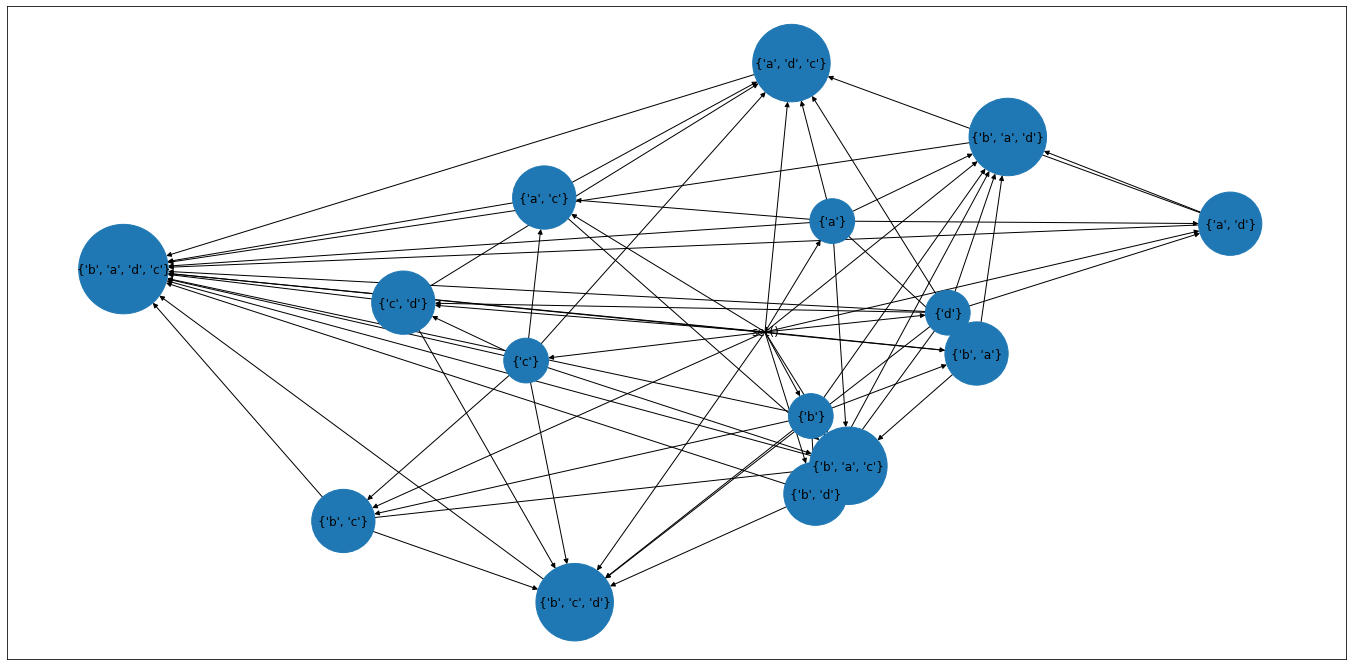

In [2]:
# Defining the elements and their relationships
sets = [set(),
        set('a'), set('b'), set('c'), set('d'),
        set('ab'), set('ac'), set('ad'), set('bc'), set('bd'), set('cd'),
        set('abc'), set('abd'), set('acd'), set('bcd'),
        set('abcd')]     
subset_relationships = [(str(s1),str(s2)) for s1 in sets for s2 in sets if ((s1 != s2) and (s1.issubset(s2)))]

# Defining the Graph object
Graph = networkx.DiGraph()
Graph.add_nodes_from([str(s) for s in sets])
Graph.add_edges_from(subset_relationships)

# Plotting
matplotlib.pyplot.figure(figsize=(24, 12))
networkx.draw_networkx(Graph, node_size=[len(eval(node))*2000 for node in Graph.nodes()])
matplotlib.pyplot.show()

## Step 1: Removing edges where the relationship is implied by the transitivity of the partial order

Edges (u,v) where there exists a path from u to v with more than one node inbetween are removed

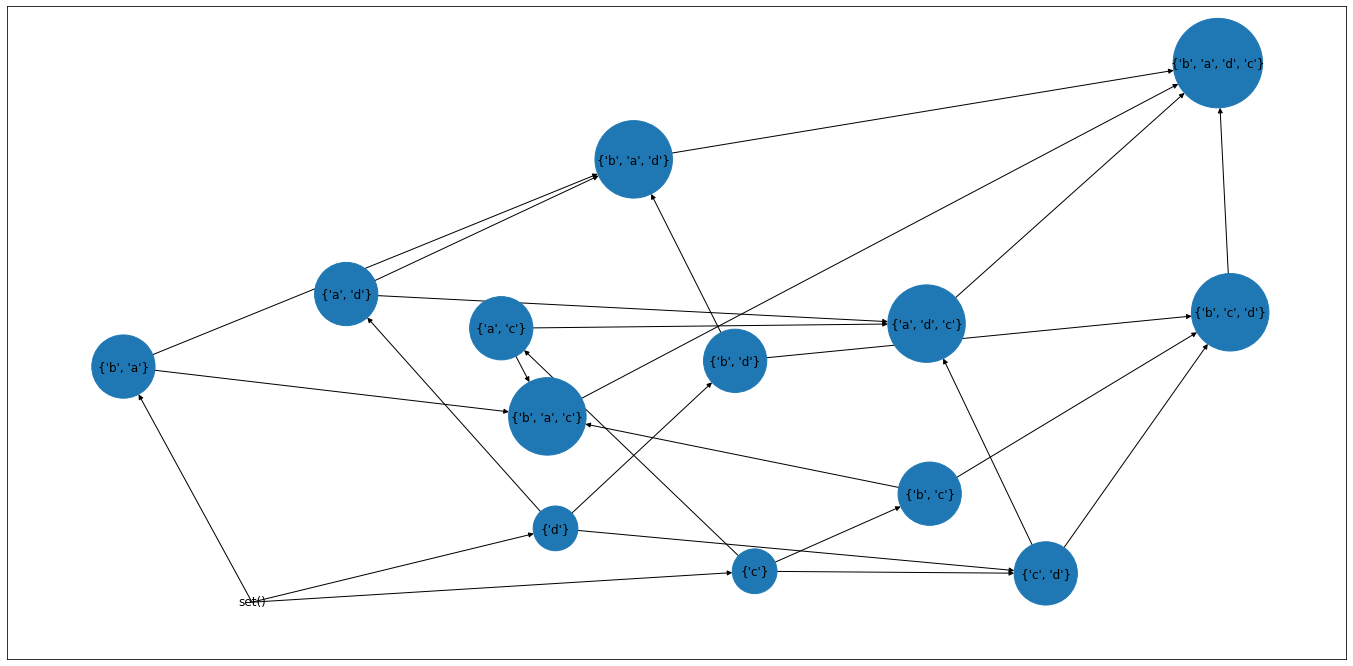

In [7]:
# Editing of the graph object (Removing edges implied by transitivity)
hasseNetworkx.transitivity_elimination(Graph)

# Plotting
matplotlib.pyplot.figure(figsize=(24, 12))
networkx.draw_networkx(Graph, node_size=[len(eval(node))*2000 for node in Graph.nodes()])
matplotlib.pyplot.show()

## Step 2: Positioning of the nodes

The positioning consists of two main steps:<br>
1. Determine y positions: Determining the layer of each node
2. Determine x positions: Spreading nodes on each layer with maximum distance

### a) Automatic layering
Here step 1 is realised by a recursive algorithm.<br> First, all nodes are positioned in layer 0.<br> In each step, all nodes v of the currently highest layer i are considered.<br> If there is another node u in layer i, such that an edge (u,v) exists in the graph, u is repositioned in layer i+1.

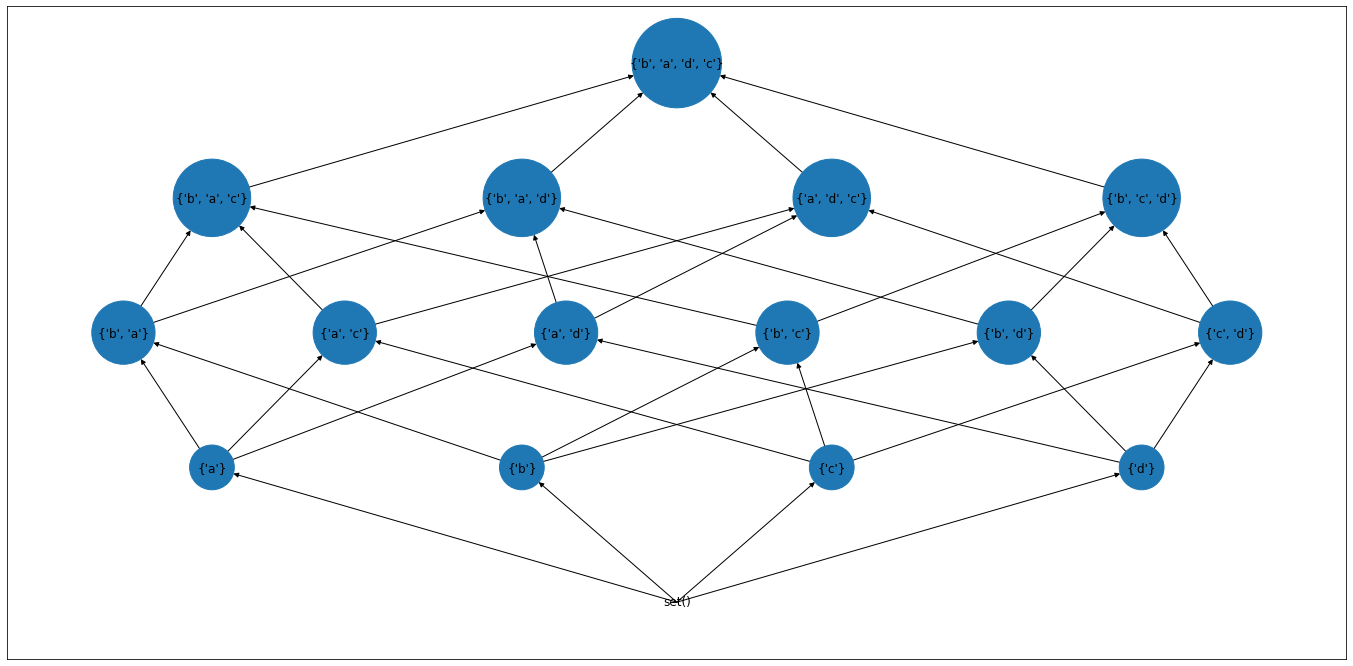

In [4]:
# Plotting with automated / default layering
matplotlib.pyplot.figure(figsize=(24, 12))
networkx.draw_networkx(Graph, node_size=[len(eval(node))*2000 for node in Graph.nodes()], pos=hasseNetworkx.layout(Graph))
matplotlib.pyplot.show()

### (b) Layering by a ranking function

The layer (y-position) is determined by a user defined function that assignes layers based on some property of the nodes.<br><br>

If we remove for example the sets {'a'} and {'b'} from the list of sets from the previous example the set {'a','b'} would be positioned in layer 1 as it now has only the empty set as the biggest subset. 

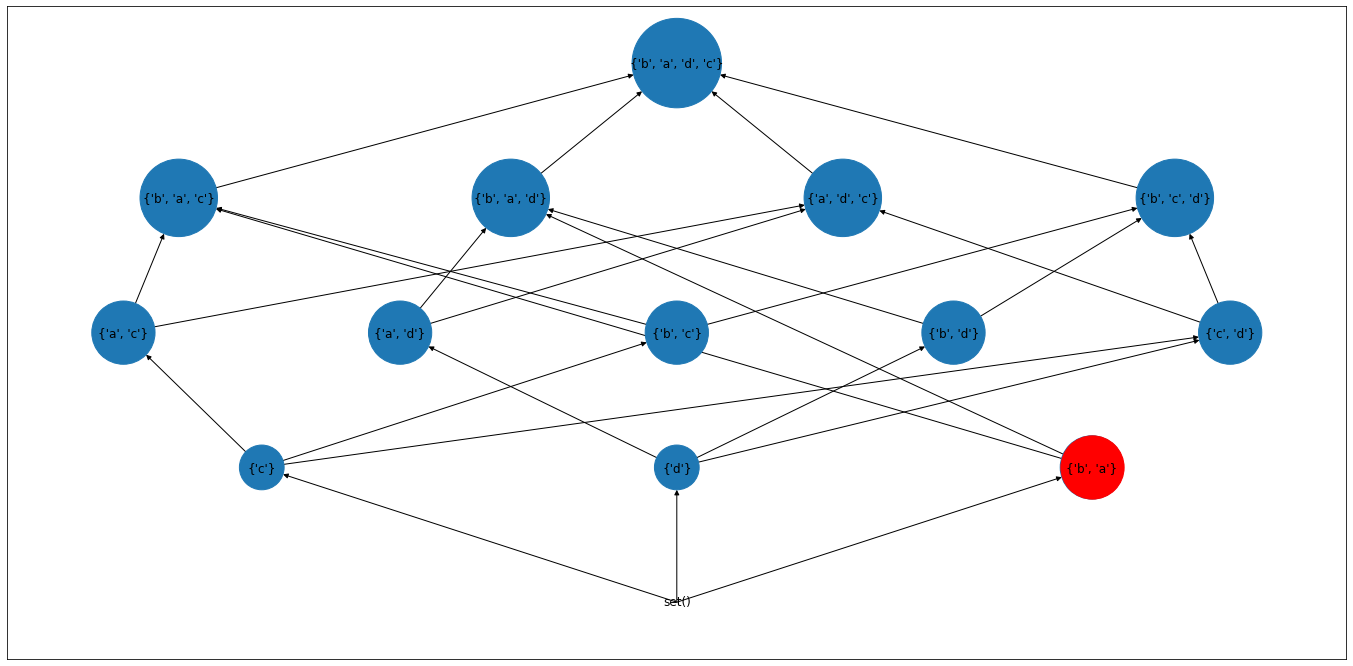

In [5]:
# Defining the elements and their relationships
sets = [set(),
        set('c'), set('d'),
        set('ab'), set('ac'), set('ad'), set('bc'), set('bd'), set('cd'),
        set('abc'), set('abd'), set('acd'), set('bcd'),
        set('abcd')]
        
subset_relationships = [(str(s1),str(s2)) for s1 in sets for s2 in sets if ((s1 != s2) and (s1.issubset(s2)))]

# Defining the Graph object
Graph = networkx.DiGraph()
Graph.add_nodes_from([str(s) for s in sets])
Graph.add_edges_from(subset_relationships)

# Editing of the graph object (Removing edges implied by transitivity)
Graph = hasseNetworkx.transitivity_elimination(Graph)

# Plotting with automated / default layering
matplotlib.pyplot.figure(figsize=(24, 12))
networkx.draw_networkx(Graph, node_size=[len(eval(node))*2000 for node in Graph.nodes()], pos=hasseNetworkx.layout(Graph))
networkx.draw_networkx_nodes(Graph, pos=hasseNetworkx.layout(Graph), nodelist=[str({'a','b'})], node_color='red', node_size=4000)
matplotlib.pyplot.show()

 We might want it to have it in the same layer as the other sets of the same size. To do so we can give a function that determines the set size as additional parameter to hasseNetworkx.layout(Graph)

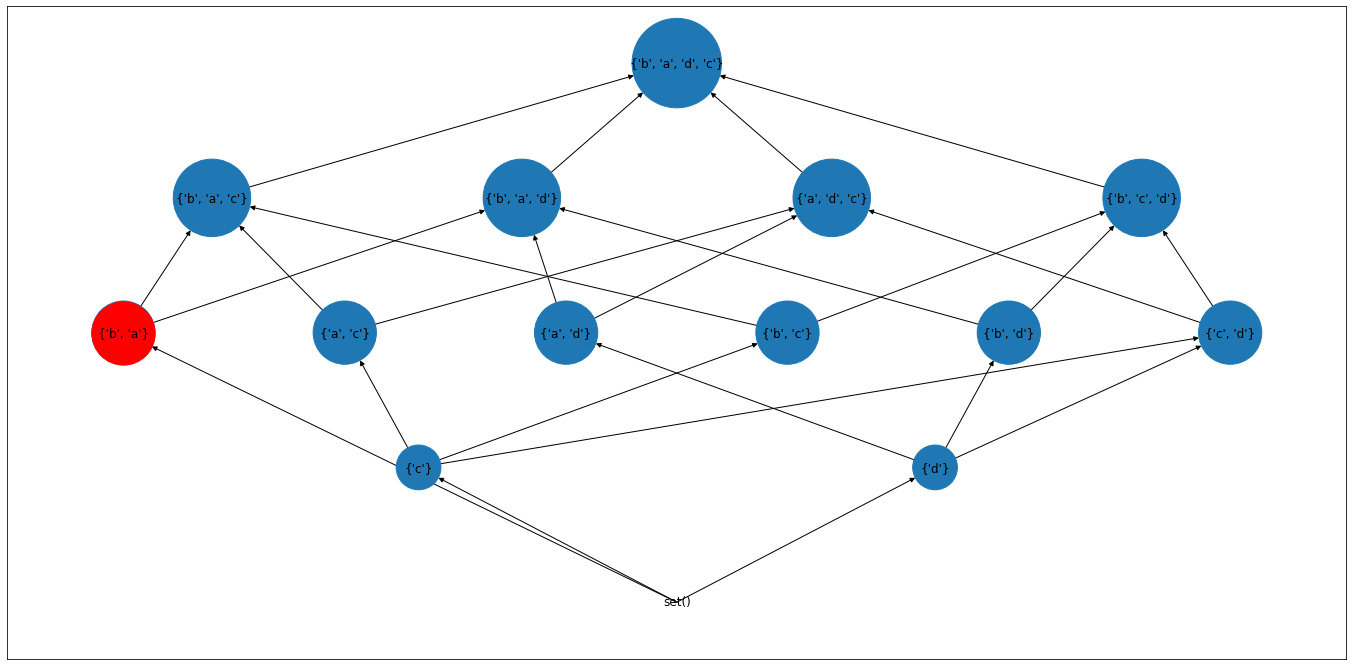

In [6]:
def set_size(s):
    return len(eval(s)) 

matplotlib.pyplot.figure(figsize=(24, 12))
networkx.draw_networkx(Graph, node_size=[len(eval(node))*2000 for node in Graph.nodes()], pos=hasseNetworkx.layout(Graph, set_size))
networkx.draw_networkx_nodes(Graph, pos=hasseNetworkx.layout(Graph, set_size), nodelist=[str({'a','b'})], node_color='red', node_size=4000)
matplotlib.pyplot.show()